In [1]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('../Student_performance_predictor/Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [5]:
# information regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
#checking for missing values
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
df.shape

(10000, 6)

In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


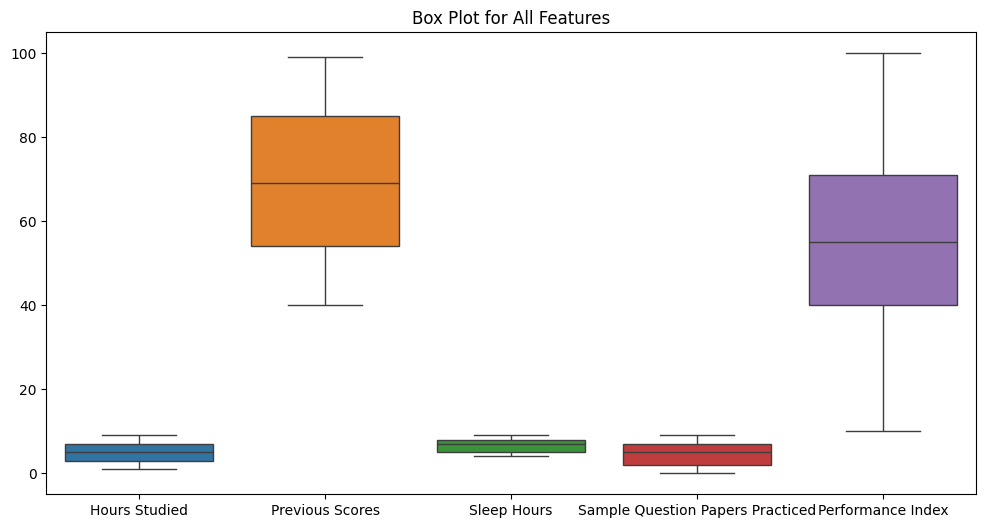

In [9]:
# Plotting box plots for all columns to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot for All Features')
plt.show()

No. of students who had extra curricular activities
Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64


<Axes: xlabel='Extracurricular Activities', ylabel='count'>

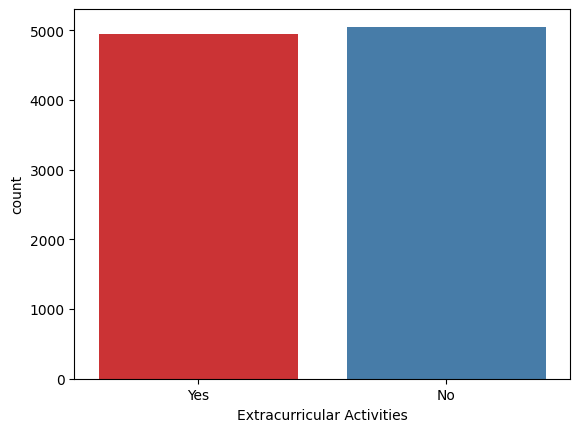

In [10]:
# Visualizing data
print("No. of students who had extra curricular activities")
print(df['Extracurricular Activities'].value_counts())
sns.countplot(x = 'Extracurricular Activities', hue = 'Extracurricular Activities', legend = False, data = df, palette = 'Set1')

In [11]:
#checking correlation among various factors
df_numeric = df.select_dtypes(exclude=['object'])
df_numeric

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,1,49,4,2,23.0
9996,7,64,8,5,58.0
9997,6,83,8,5,74.0
9998,9,97,7,0,95.0


In [12]:
corr = df_numeric.corr()
corr

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


<Axes: >

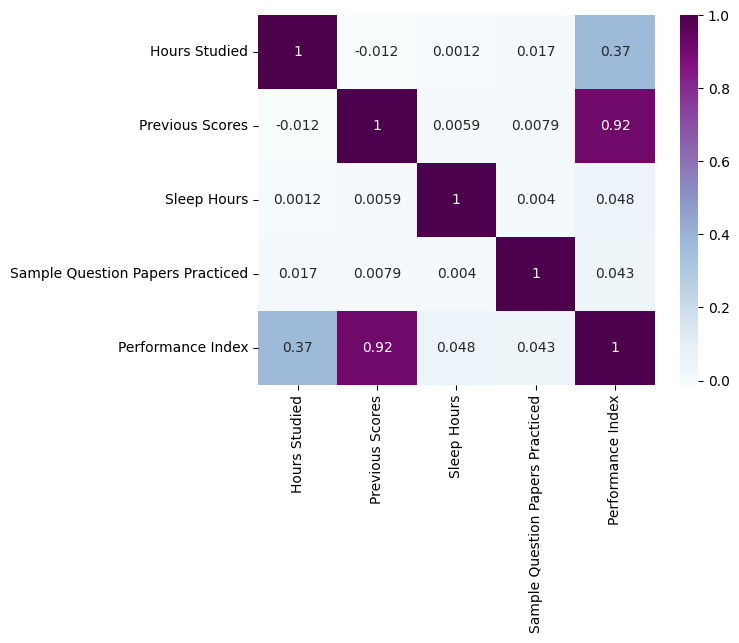

In [13]:
sns.heatmap(corr, annot = True, cmap = 'BuPu')

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [15]:
# Creating independent and dependent features 
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [18]:
model = LinearRegression()

In [19]:
model.fit(x_train_scaled, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(x_test_scaled)

In [21]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.636837605606022
R-squared: 0.9874149336820424


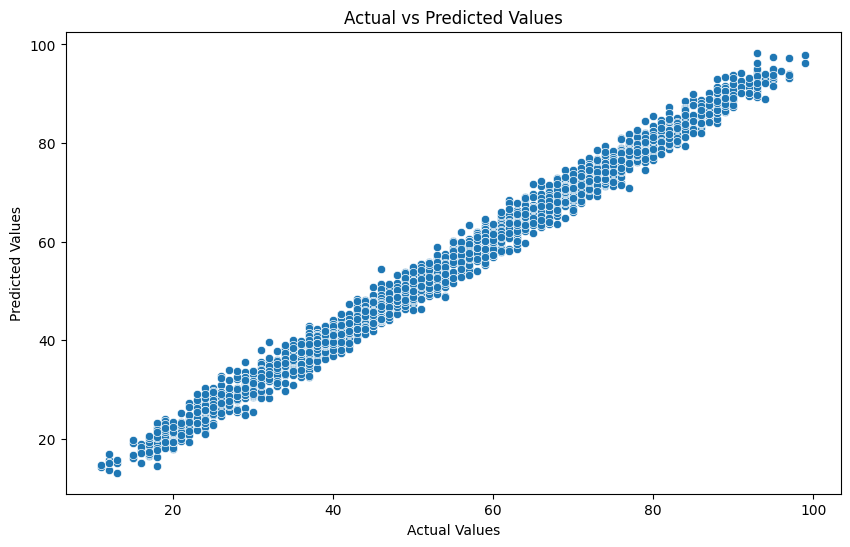

In [23]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

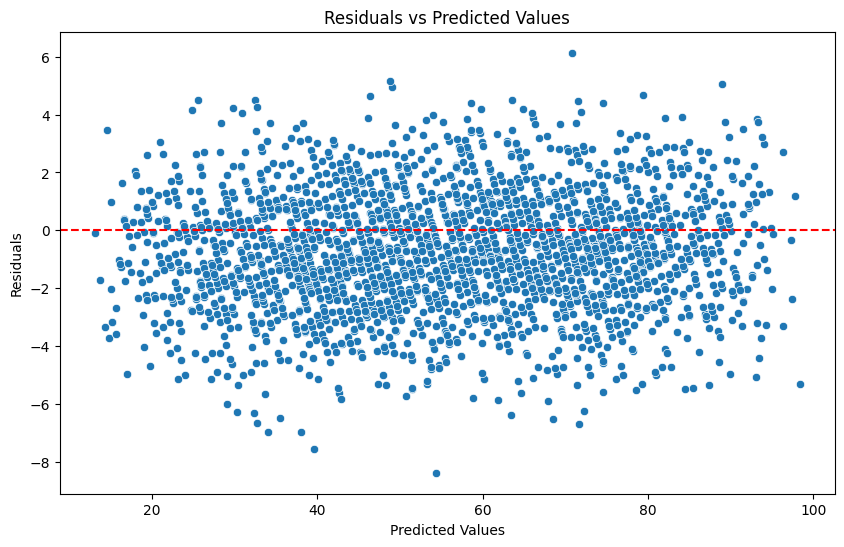

In [24]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [25]:
# Creating summary table
summary_df = pd.DataFrame({
    'Features': ['Intercept'] + list(X.columns),
    'Coefficients': [model.intercept_] + list(model.coef_),
    'Mean Squared Error': [mse] + [''] * len(model.coef_),
    'R-squared': [r2] + [''] * len(model.coef_)
})

print(summary_df)

                           Features  Coefficients Mean Squared Error R-squared
0                         Intercept     55.418400           4.636838  0.987415
1                     Hours Studied      7.409739                             
2                   Previous Scores     17.620003                             
3        Extracurricular Activities      0.291837                             
4                       Sleep Hours      0.810243                             
5  Sample Question Papers Practiced      0.546244                             


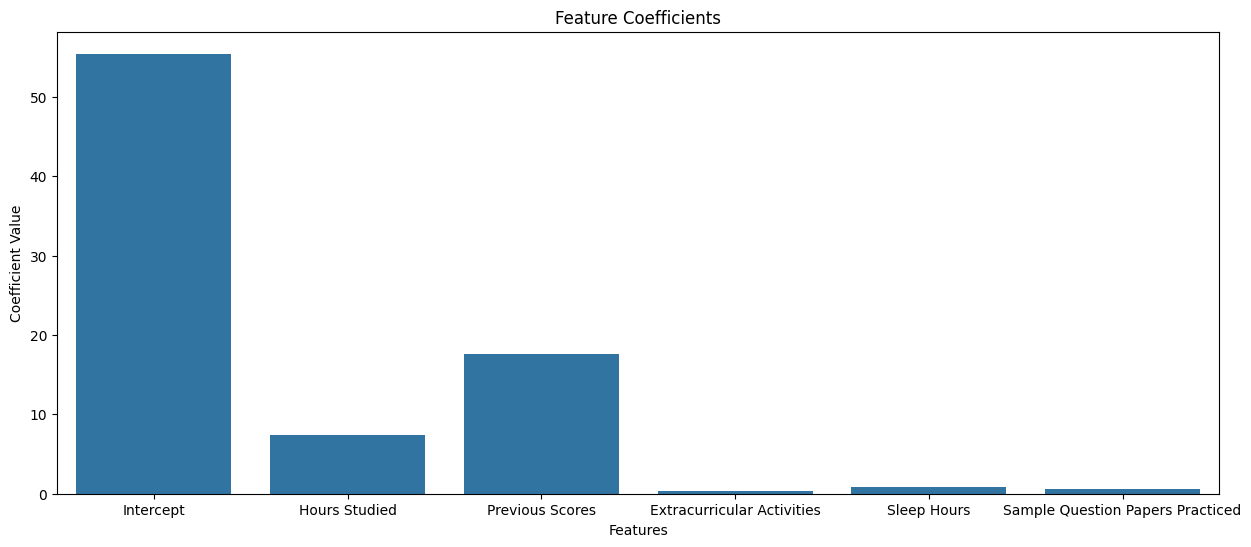

In [27]:
# Plotting coefficients
coefficients = [model.intercept_] + list(model.coef_)
features = ['Intercept'] + list(X.columns)

plt.figure(figsize=(15, 6))
sns.barplot(x=features, y=coefficients)
plt.title('Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()